<a href="https://colab.research.google.com/github/mmalinda/DS-Core/blob/master/Moringa_Data_Science_Core_W6_Independent_Project_2020_01_MMalinda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Independent Project - Week 6: Supervised Learning

## 1. Defining the Question

### a) Specifying the Question

Mchezopesa Ltd would like a model that can predict the result of a football game based on the ranks of home and away teams, and the tournament type. 


### b) Defining the Metric for Success

The analysis will be successful if the models created can predict the results for the game 

### c) Understanding the context 

The data used for this analysis is ranking data from FIFA men's national teams in association football. The teams are ranked based on game results and the most successful teams are ranked highest (i.e. the team at rank 1 is most successful). The ranking is based on a points system which awards points based on the results of all FIFA-recognised full international matches. The points system was changed to exclude the effect of home and away status of teams, which has generated some debate. If we can find a significant difference between scores when teams are home or away, we can deduce whether this is important for the points system.

### d) Recording the Experimental Design

The plan for this analysis is as follows:


1.   Business Understanding
2.   Data Understanding
3.   Exploratory Data Analysis
4.   Data Cleaning
5.   Creating models
6.   Evaluating models
7.   Recommendations 



### e) Data Relevance

The data used for this analysis was sufficient and accurate enough.

## 2. Reading the Data

In [0]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from statistics import mean
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [0]:
# Loading the Dataset
ranking = pd.read_csv('fifa_ranking.csv')
results = pd.read_csv('results.csv')

## 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset, and checking whether each column has an appropriate datatype
print(ranking.info())

print(results.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null object
dtypes: float64(9), int64(3), object(4)
memory usage: 7.1+ MB
None
<class 'pandas.core.frame.DataFram

In [4]:
# Previewing the top of the rankings dataset
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [5]:
# Previewing the top of the results dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [6]:
# Previewing the bottom of the rankings dataset
ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [7]:
# Previewing the bottom of the results dataset
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [8]:
# Changing date columns to datetime
ranking['rank_date'] = pd.to_datetime(ranking['rank_date'], format="%Y-%m-%d")
ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(3), object(3)
memory usage: 7.1+ MB


In [9]:
# Changing date columns to datetime
results['date'] = pd.to_datetime(results['date'], format="%Y-%m-%d")
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null datetime64[ns]
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.5+ MB


## 4. External Data Source Validation

The data source seems to be valid and reliable according to the previewed data.

## 5. Tidying the Dataset

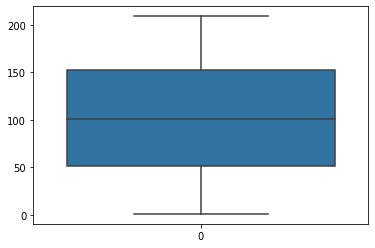

In [10]:
# Checking for Outliers (rankings)
sns.boxplot(data = ranking['rank'])

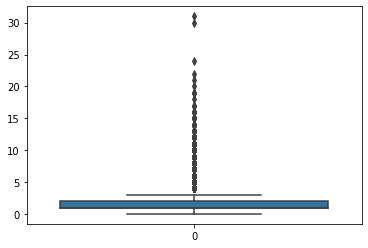

In [11]:
# Checking for Outliers (results)
sns.boxplot(data = results['home_score'])

In [12]:
# Checking the games with outliers
results.sort_values(by = ['home_score'], ascending = False)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
23781,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False
7893,1971-09-13,Tahiti,Cook Islands,30,0,South Pacific Games,Papeete,French Polynesia,False
10931,1979-08-30,Fiji,Kiribati,24,0,South Pacific Games,Nausori,Fiji,False
23778,2001-04-09,Australia,Tonga,22,0,FIFA World Cup qualification,Coffs Harbour,Australia,False
28815,2006-11-24,Sápmi,Monaco,21,1,Viva World Cup,Hyères,France,True
...,...,...,...,...,...,...,...,...,...
14712,1987-12-16,Israel,Switzerland,0,2,Friendly,Ramat-Gan,Israel,False
14711,1987-12-16,Greece,Netherlands,0,3,UEFA Euro qualification,Rhodes,Greece,False
31044,2009-02-11,Estonia,Kazakhstan,0,2,Friendly,Antalya,Turkey,True
31045,2009-02-11,France,Argentina,0,2,Friendly,Marseille,France,False


These top scores were validated externally and they are correct

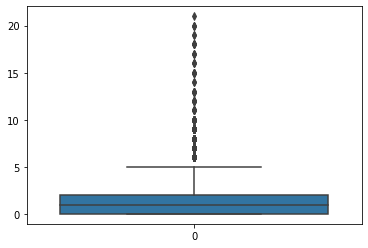

In [13]:
# Checking for Outliers (results)
sns.boxplot(data = results['away_score'])

In [14]:
# Checking the games with outliers
results.sort_values(by = ['away_score'], ascending = False)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
27350,2005-03-11,Guam,North Korea,0,21,EAFF Championship,Taipei,Chinese Taipei,True
14705,1987-12-15,American Samoa,Papua New Guinea,0,20,South Pacific Games,Nouméa,New Caledonia,True
25671,2003-06-30,Sark,Isle of Wight,0,20,Island Games,St. Martin,Guernsey,True
35998,2014-06-01,Darfur,Padania,0,20,CONIFA World Football Cup,Östersund,Sweden,True
12697,1983-08-22,Niue,Papua New Guinea,0,19,South Pacific Games,Apia,Western Samoa,True
...,...,...,...,...,...,...,...,...,...
20764,1997-09-06,Austria,Sweden,1,0,FIFA World Cup qualification,Vienna,Austria,False
20763,1997-09-06,Armenia,Albania,3,0,FIFA World Cup qualification,Yerevan,Armenia,False
20759,1997-09-02,China PR,Kazakhstan,3,0,Friendly,Dalian,China PR,False
20757,1997-08-30,South Korea,China PR,0,0,Friendly,Seoul,South Korea,False


These top scores were validated externally and they are correct

In [15]:
# Identifying the Missing Data
print(ranking.isnull().sum())

print(results.isnull().sum())

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64
date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64


In [0]:
# Removing unnecessary columns
df_rank = ranking.loc[:, ('rank', 'country_full', 'rank_date')]
df_results = results.loc[:, ('date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'neutral')]

In [17]:
# Checking for duplicates
df_rank[df_rank.duplicated()].count()

rank            38
country_full    38
rank_date       38
dtype: int64

In [0]:
# Dropping duplicated rows
df_rank.drop_duplicates(inplace=True)

In [19]:
# Checking that duplicates were dropped
df_rank[df_rank.duplicated()].count()

rank            0
country_full    0
rank_date       0
dtype: int64

## 6. Exploratory Analysis

In [20]:
# Using pandas profiling to get univariate summaries
import pandas_profiling as pp
pp.ProfileReport(df_rank)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,4
Number of observations,57755
Total Missing (%),0.0%
Total size in memory,1.8 MiB
Average record size in memory,32.0 B
Numeric,2
Categorical,1
Boolean,0
Date,1
Text (Unique),0
Rejected,0


In [21]:
# Using pandas profiling to get univariate summaries
pp.ProfileReport(df_results)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,7
Number of observations,40839
Total Missing (%),0.0%
Total size in memory,1.9 MiB
Average record size in memory,49.0 B
Numeric,2
Categorical,3
Boolean,1
Date,1
Text (Unique),0
Rejected,0


In [0]:
# Defining the function for getting the rank given the date
def ranks(team, date):
    ranking = 0
    country_rank = df_rank[(df_rank['country_full'] == team)& (df_rank['rank_date'] <= date)]
    if len(country_rank) >0:
        date_rank = country_rank[country_rank['rank_date'] == country_rank['rank_date'].max()]
        ranking = date_rank.iloc[0,0]
    return ranking

In [0]:
# Filling in ranks for home teams
df_results['home_rank'] =  df_results.apply (lambda x: ranks(x['home_team'], x['date']), axis = 1)

In [0]:
# Filling in rank for away teams
df_results['away_rank'] =  df_results.apply (lambda x: ranks(x['away_team'], x['date']), axis = 1)

In [25]:
# Removing records without home team ranking
df = df_results[df_results['home_rank'] != 0]
df.count()

date          20171
home_team     20171
away_team     20171
home_score    20171
away_score    20171
tournament    20171
neutral       20171
home_rank     20171
away_rank     20171
dtype: int64

In [26]:
# Removing records without away team ranking
df = df[df['away_rank'] != 0]
df.count()

date          18261
home_team     18261
away_team     18261
home_score    18261
away_score    18261
tournament    18261
neutral       18261
home_rank     18261
away_rank     18261
dtype: int64

In [0]:
# Checking that records with no ranking were dropped
df.sample(15)

In [0]:
#Dropping Neutral column
df = df.drop(columns = 'neutral', inplace = True)
df.head()

In [89]:
# Encoding tournament column
tourn = pd.get_dummies(df['tournament'], prefix_sep='_', )
tourn.reset_index()
tourn

,ABCS Tournament,AFC Asian Cup,AFC Asian Cup qualification,AFC Challenge Cup,AFC Challenge Cup qualification,AFF Championship,African Cup of Nations,African Cup of Nations qualification,African Nations Championship,Amílcar Cabral Cup,Baltic Cup,CECAFA Cup,CFU Caribbean Cup,CFU Caribbean Cup qualification,COSAFA Cup,Confederations Cup,Copa América,Copa América qualification,Copa Paz del Chaco,Copa del Pacífico,Cyprus International Tournament,Dragon Cup,Dunhill Cup,Dynasty Cup,EAFF Championship,FIFA World Cup,FIFA World Cup qualification,Friendly,Gold Cup,Gold Cup qualification,Gulf Cup,Intercontinental Cup,King Hassan II Tournament,King's Cup,Kirin Cup,Korea Cup,Lunar New Year Cup,Malta International Tournament,Merdeka Tournament,Millennium Cup,Nations Cup,Nehru Cup,Nile Basin Tournament,Nordic Championship,OSN Cup,Oceania Nations Cup,Oceania Nations Cup qualification,Pacific Games,Prime Minister's Cup,SAFF Cup,SKN Football Festival,Simba Tournament,South Pacific Games,Tournoi de France,UAFA Cup,UAFA Cup qualification,UEFA Euro,UEFA Euro qualification,UEFA Nations League,UNCAF Cup,UNIFFAC Cup,USA Cup,United Arab Emirates Friendship Tournament,VFF Cup,WAFF Championship,Windward Islands Tournament
17915,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17916,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17917,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17918,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17919,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40832,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40834,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40835,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40836,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
# Creating a variable for the encoded data
friendly = pd.DataFrame(tourn['Friendly'])
friendly

,Friendly
17915,0
17916,1
17917,0
17918,1
17919,0
...,...
40832,0
40834,0
40835,0
40836,0


In [97]:
# Adding the encoded column to the dataframe
df = pd.concat([df, tourn['Friendly']], axis=1, sort = True)
df

,date,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank,Friendly
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59,22,0
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,8,14,1
17917,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,35,94,0
17918,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,65,86,1
17919,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,67,5,0
...,...,...,...,...,...,...,...,...,...
40832,2019-07-18,Samoa,Vanuatu,0,11,Pacific Games,197,162,0
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,192,157,0
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,165,143,0
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,27,66,0


In [0]:
# Dropping the column tournament
df = df.drop(columns = 'tournament')

In [101]:
# Checking for correlation between variables
df.corr()

,home_score,away_score,home_rank,away_rank,Friendly
home_score,1.000000,-0.165712,-0.123277,0.301964,-0.047398
away_score,-0.165712,1.000000,0.209972,-0.160241,-0.034819
home_rank,-0.123277,0.209972,1.000000,0.484320,-0.092101
away_rank,0.301964,-0.160241,0.484320,1.000000,-0.085040
Friendly,-0.047398,-0.034819,-0.092101,-0.085040,1.000000


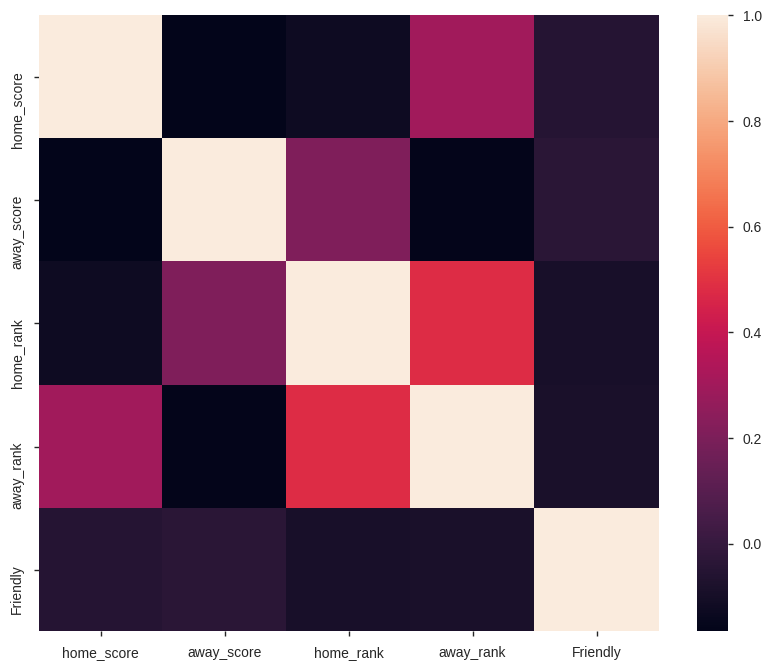

In [102]:
# Plotting a heatmap to check correlation
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## 7. Implementing the Solution

### Polynomial Model 1

In [129]:
# Checking for multicollinearity
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

,home_score,away_score,home_rank,away_rank,Friendly
home_score,1.231555,0.024530,0.427768,-0.570872,0.050079
away_score,0.024530,1.156013,-0.423343,0.385863,0.035237
home_rank,0.427768,-0.423343,1.620904,-0.975935,0.071830
away_rank,-0.570872,0.385863,-0.975935,1.710446,0.041948
Friendly,0.050079,0.035237,0.071830,0.041948,1.013783


In [141]:
# Splitting the data into dependent and independent variables
X = df.iloc[:, 5:8].values
y = df.iloc[:, 3].values
print(X)
print(y)

[[ 59  22   0]
 [  8  14   1]
 [ 35  94   0]
 ...
 [165 143   0]
 [ 27  66   0]
 [166 165   0]]
[3 1 5 ... 4 0 1]


In [146]:
X.shape

(18261, 3)

In [148]:
y.shape

(18261,)

In [142]:
# Splitting the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Fitting polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [149]:
X_train.shape

(14608, 3)

In [150]:
Y_train.shape

(3653, 3)

In [143]:
# Predicting home score using Polynomial Regression using home rank 56, away rank 4 and friendly tournament
home_poly_pred = pol_reg.predict(poly_reg.fit_transform([[1, 40, 1]]))
print('Polynomial prediction: %d' %home_poly_pred)

# Getting the predictions as an array
poly_arr_pred = pol_reg.predict(poly_reg.fit_transform(X))
print(poly_arr_pred)

Polynomial prediction: 1
[1.01004413 1.53258426 2.24699168 ... 1.50067221 1.87222506 1.94446935]


In [144]:
#Checking residuals
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

home_poly_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(home_poly__predict, X_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

ValueError: ignored

### Polynomial Model 2

In [117]:
# Splitting the data into dependent and independent variables
X = df.iloc[:, 5:8].values
y = df.iloc[:, 4].values
print(X)
print(y)

[[ 59  22   0]
 [  8  14   1]
 [ 35  94   0]
 ...
 [165 143   0]
 [ 27  66   0]
 [166 165   0]]
[1 1 0 ... 4 1 1]


In [118]:
# Splitting the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Fitting polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
# Predicting away score using Polynomial Regression using home rank 56, away rank 4 and friendly tournament
poly_pred = pol_reg.predict(poly_reg.fit_transform([[1, 40, 1]]))
print('Polynomial prediction: %d' %poly_pred)

# Getting the predictions as an array
poly_arr_pred = pol_reg.predict(poly_reg.fit_transform(X))
print(poly_arr_pred)

Polynomial prediction: 1
[1.33244187 1.14459219 0.51660784 ... 1.46091261 0.67733924 1.30358397]


### Logistic Model 1

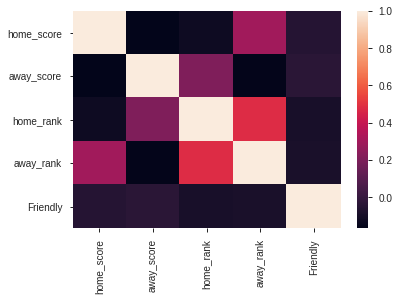

In [120]:
# Checking for independence between features
sns.heatmap(df.corr())  

In [121]:
# Checking that the dataset size is sufficient
# There 3 predictive features, so we need at least 150 records in this dataset. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18261 entries, 17915 to 40838
Data columns (total 8 columns):
date          18261 non-null datetime64[ns]
home_team     18261 non-null object
away_team     18261 non-null object
home_score    18261 non-null int64
away_score    18261 non-null int64
home_rank     18261 non-null int64
away_rank     18261 non-null int64
Friendly      18261 non-null uint8
dtypes: datetime64[ns](1), int64(4), object(2), uint8(1)
memory usage: 1.1+ MB


In [127]:
# Checking for multicollinearity
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

,home_score,away_score,home_rank,away_rank,Friendly
home_score,1.231555,0.024530,0.427768,-0.570872,0.050079
away_score,0.024530,1.156013,-0.423343,0.385863,0.035237
home_rank,0.427768,-0.423343,1.620904,-0.975935,0.071830
away_rank,-0.570872,0.385863,-0.975935,1.710446,0.041948
Friendly,0.050079,0.035237,0.071830,0.041948,1.013783


In [151]:
# Splitting our dataset
X = df.iloc[:, 5:8].values
y = df.iloc[:, 3].values
print(X)
print(y)

# Splitting into test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=0)

[[ 59  22   0]
 [  8  14   1]
 [ 35  94   0]
 ...
 [165 143   0]
 [ 27  66   0]
 [166 165   0]]
[3 1 5 ... 4 0 1]


In [152]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [125]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[569, 720,  81,  11,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [449, 981, 166,  44,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [216, 748, 207,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [ 75, 361, 138,  48,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [ 17, 165,  94,  43,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  2,  64,  35,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  1,  34,  20,  20,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   5,  13,  10,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  1,   5,  11,   8,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   5,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         